In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [8]:
data = pd.read_csv("Student_Performance.csv")

In [11]:
data.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


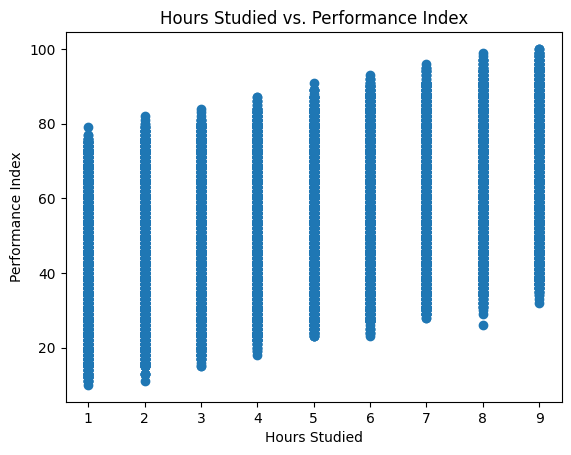

In [6]:
plt.scatter(data['Hours Studied'], data['Performance Index'])
plt.xlabel('Hours Studied')
plt.ylabel('Performance Index')
plt.title('Hours Studied vs. Performance Index')
plt.show()

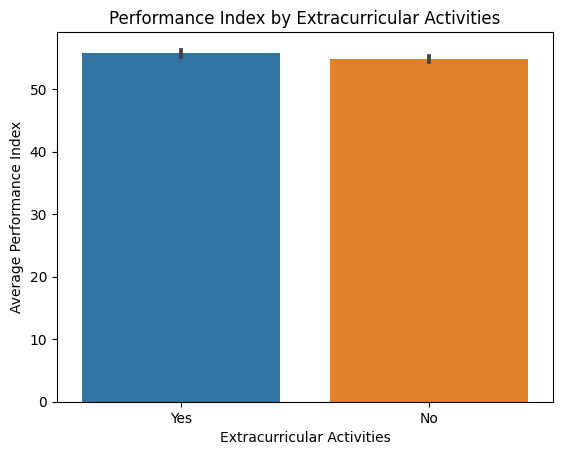

In [7]:
sns.barplot(x='Extracurricular Activities', y='Performance Index', data=data)
plt.xlabel('Extracurricular Activities')
plt.ylabel('Average Performance Index')
plt.title('Performance Index by Extracurricular Activities')
plt.show()

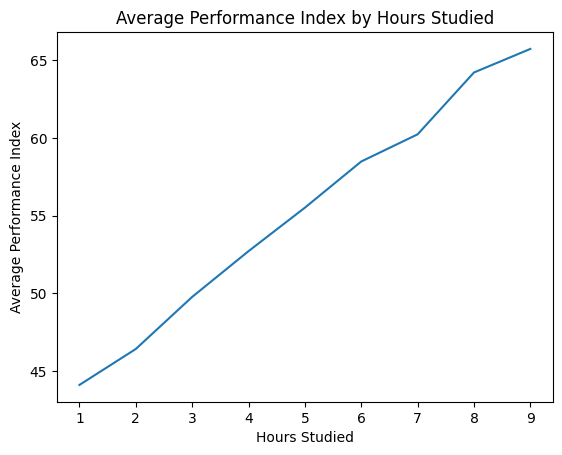

In [8]:
avg_performance_by_hours = data.groupby('Hours Studied')['Performance Index'].mean()
plt.plot(avg_performance_by_hours.index, avg_performance_by_hours.values)
plt.xlabel('Hours Studied')
plt.ylabel('Average Performance Index')
plt.title('Average Performance Index by Hours Studied')
plt.show()

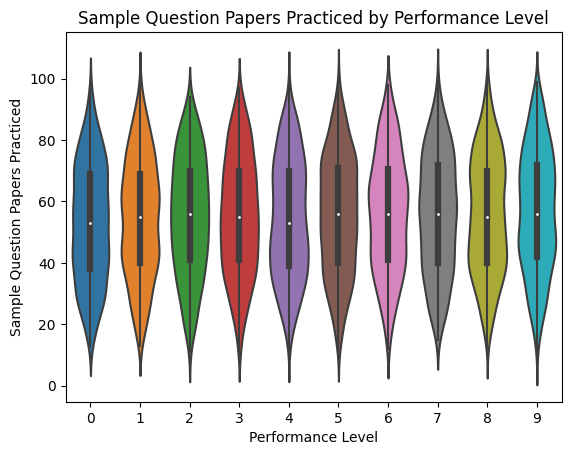

In [9]:
sns.violinplot(y='Performance Index', x='Sample Question Papers Practiced', data=data)
plt.xlabel('Performance Level')
plt.ylabel('Sample Question Papers Practiced')
plt.title('Sample Question Papers Practiced by Performance Level')
plt.show()

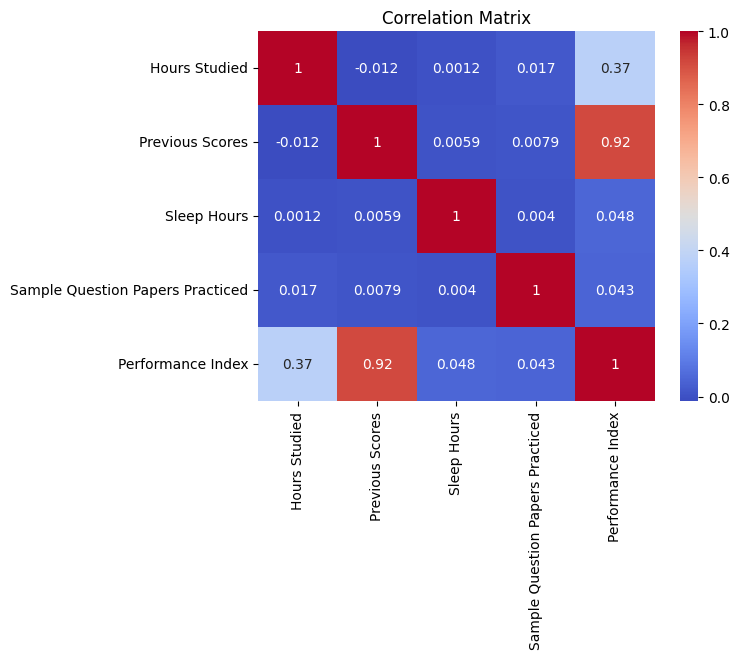

In [10]:
correlation_matrix = data[['Hours Studied', 'Previous Scores', 'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

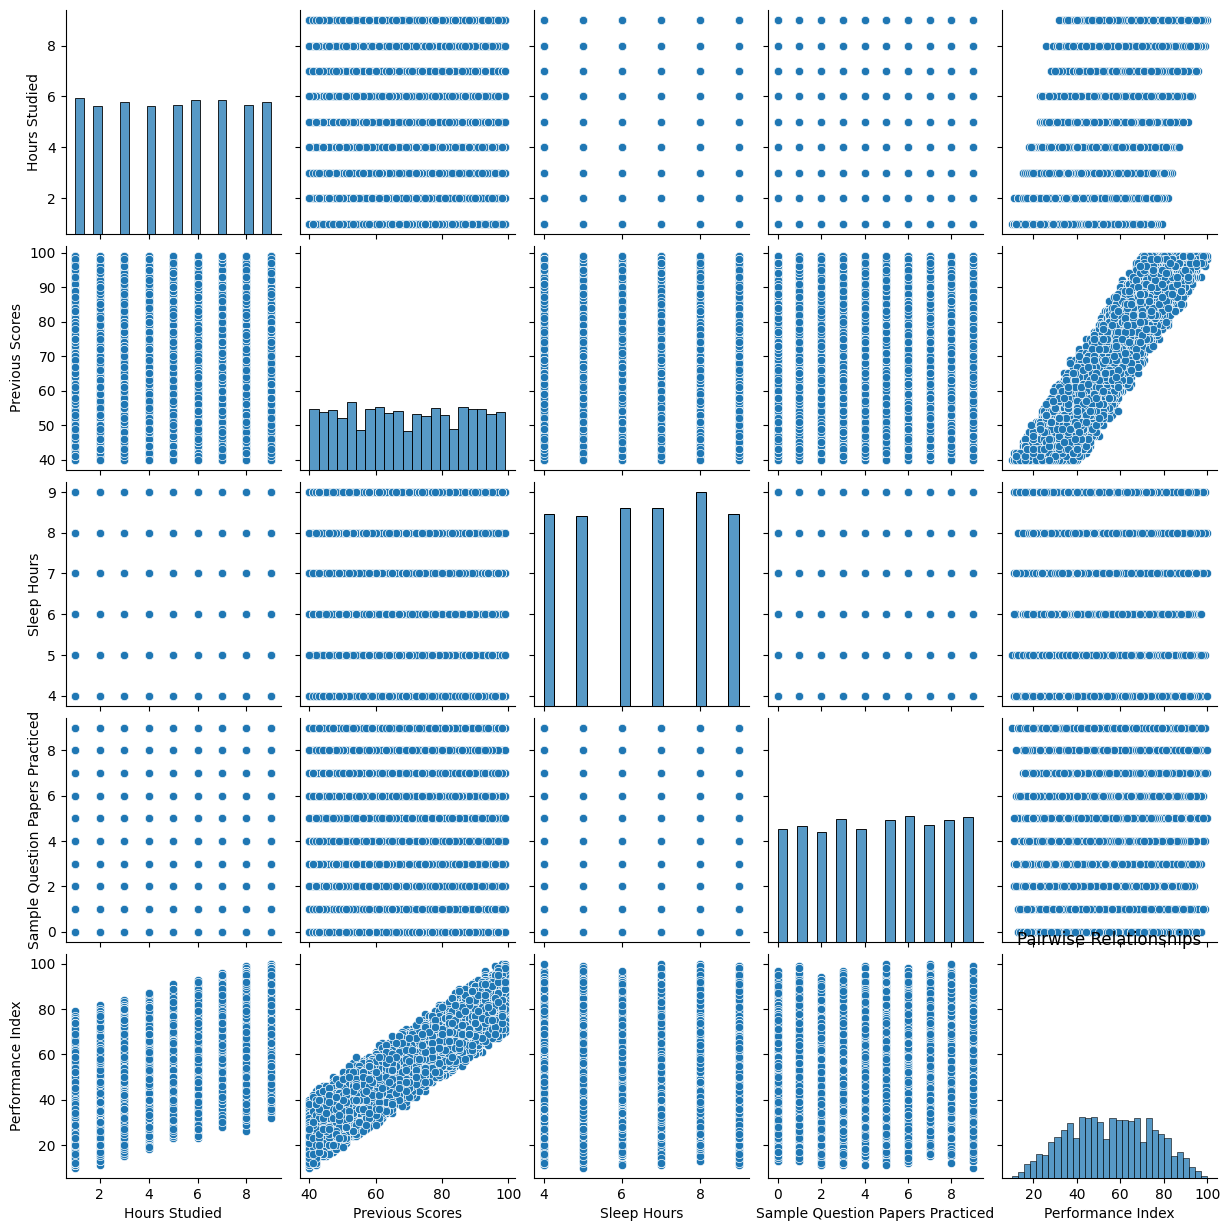

In [12]:
sns.pairplot(data[['Hours Studied', 'Previous Scores', 'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index']])
plt.title('Pairwise Relationships')
plt.show()


In [14]:
# Splitting data into Indipendent and Dependent Variable
X = data.drop("Performance Index", axis=1)
y = data["Performance Index"]

In [15]:
# Splitting data into Train and Test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
# Label Encoding the Categorical Column
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
X_train["Extracurricular Activities"] = encoder.fit_transform(X_train["Extracurricular Activities"])
X_test["Extracurricular Activities"] = encoder.transform(X_test["Extracurricular Activities"])

In [17]:
# Training a Simple Linear Regression Model
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [19]:
# Predicting Test Set Results
y_pred = regressor.predict(X_test)
y_pred = np.round_(y_pred, decimals = 2)

In [20]:
pd.DataFrame({'Actual Performance': y_test, 'Predicted Performance': y_pred})

,Actual Performance,Predicted Performance
6252,51.0,54.71
4684,20.0,22.62
1731,46.0,47.90
4742,28.0,31.29
4521,41.0,43.00
...,...,...
6412,45.0,46.89
8285,66.0,62.70
7853,16.0,16.79
1095,65.0,63.34


In [21]:
from sklearn.metrics import r2_score, mean_squared_error
r2 = r2_score(y_test, y_pred)
mean_er = mean_squared_error(y_test, y_pred)

In [22]:
print('Mean Squared Error : ', mean_er)
print('R Square : ', r2)

Mean Squared Error :  4.0826094
R Square :  0.9889833422235986


In [24]:
print(regressor.coef_)
print(regressor.intercept_)

[2.85248393 1.0169882  0.60861668 0.47694148 0.19183144]
-33.921946215556126


In [30]:
X = data[['Sleep Hours','Hours Studied']]
y = data['Performance Index']

In [31]:
from sklearn import linear_model

In [1]:
regr = linear_model.LinearRegression()
regr.fit(X, y)
predictedindex = regr.predict([[, 6]])

print(predictedindex)

NameError: name 'linear_model' is not defined

In [33]:
regr = linear_model.LinearRegression()
regr.fit(X, y)

print(regr.coef_)

[0.53972323 2.77262266]


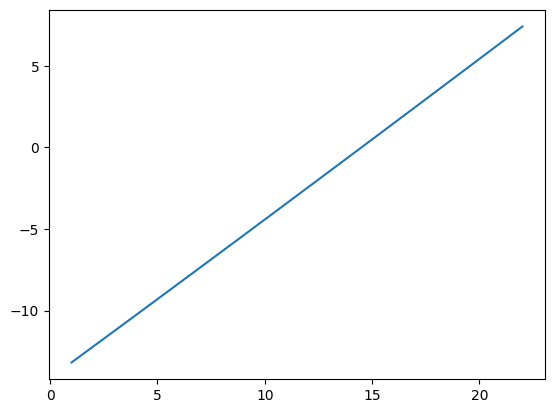

-9.303987798407299


In [44]:
a=data['Previous Scores']
b=data['Performance Index']
mymodel = np.poly1d(np.polyfit(a, b, 3))

myline = np.linspace(1, 22, 100)


plt.plot(myline, mymodel(myline))
plt.show()
mymodel = np.poly1d(np.polyfit(a, b, 3))

speed = mymodel(95)
print(speed)
